In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

/data/gaojie/miniforge3/envs/GLUE/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 4]
os.chdir('/home/gaojie/workspace/Mida_collab/')

In [3]:
adata = sc.read_h5ad('Multi-omics_intergration/data/adata_RNA_final_input.h5ad')

In [4]:
RGG_df = pd.read_csv('CellOracle/gradient_table2.vRG.tsv',sep='\t') ### RNA Gradient genes
RGG_df = RGG_df[RGG_df['p_val']<=0.05]
RGG_df = RGG_df[RGG_df['Module'].isin([2,3,4,5])] ###Select Pseudoage genes

In [5]:
RGG_df_gene = [i for i in RGG_df['gene'] if i in adata.var_names]
adata.var.loc[RGG_df_gene, 'highly_variable'] = True
print(len(RGG_df_gene))

0


In [6]:
adata.var['highly_variable'].sum()

5424

In [7]:
celltype_dict = {'Nascent ExN':'Nascent_ExN','Microglia/OPC':'Microglia_OPC'}###match the celltype name
sample_dict = {'GW11_C':'Sulcus','GW11_D':'Distant','GW11_G':'Adjacent'}###match the sample name
adata.obs['celltype'].replace(celltype_dict,inplace=True)
adata.obs['sample'].replace(sample_dict,inplace=True)

In [8]:
adata.obs['celltype_sample'] = adata.obs['celltype'].astype(str)+'_'+adata.obs['sample'].astype(str)

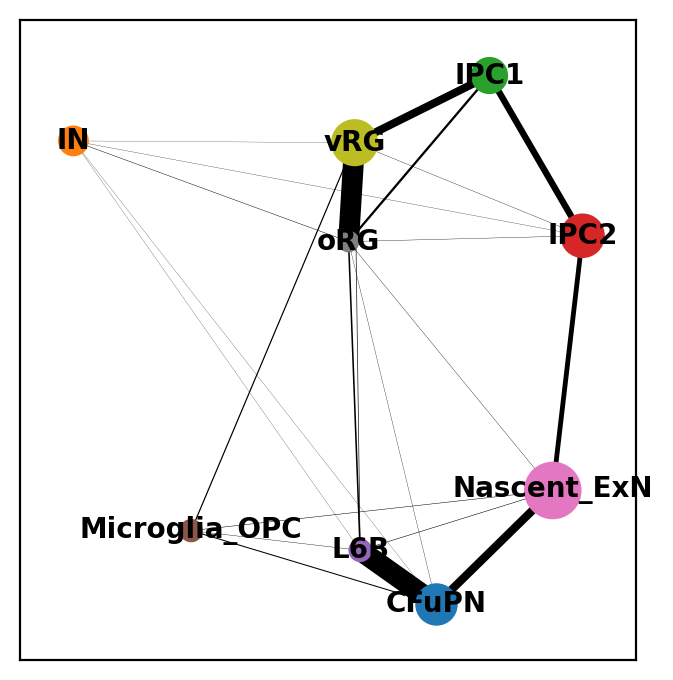

In [9]:
sc.tl.paga(adata, groups='celltype')
sc.pl.paga(adata)

In [10]:
sc.tl.draw_graph(adata, init_pos='paga', random_state=123)

In [11]:
adata.write('CellOracle/input/scRNA_input_celltype.h5ad')